## Лабораторна робота 5 - Штучні нейронні мережі.

У цій роботі Ви побудуєте нейронну мережу для класифікації зображень рукописних символів за датасетом MNIST.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

У файлі **mnist.npz** міститься датасет MNIST. Завантажимо його та візуалізуємо.

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


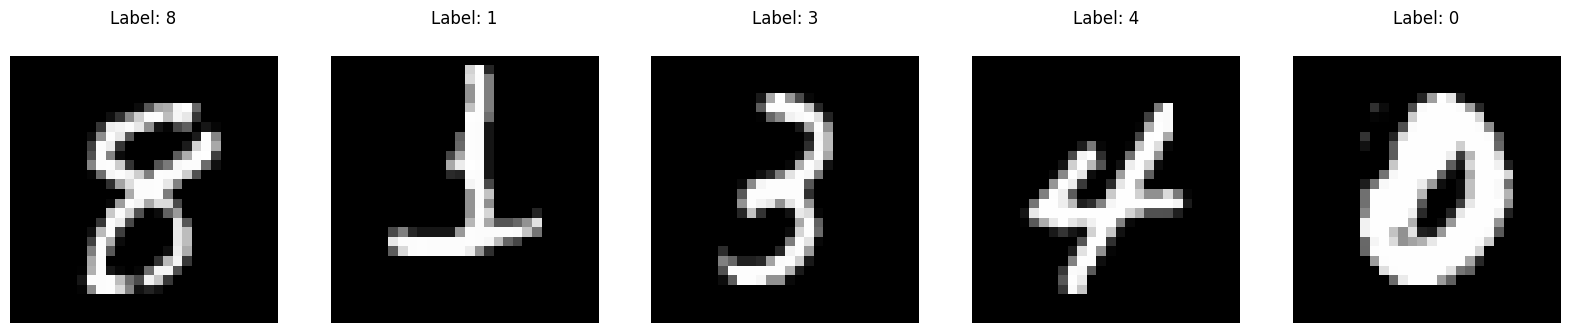

In [31]:
with np.load('mnist.npz') as npz:
    x_train, y_train, x_test, y_test = [npz[k] for k in ['x_train', 'y_train', 'x_test', 'y_test']]

fig, ax = plt.subplots(figsize=(20, 4),  ncols=5)
for a in ax:
    i = np.random.randint(x_train.shape[0])
    a.matshow(x_train[i], cmap='gray')
    a.set_title(f'Label: {y_train[i]}')
    a.axis('off')
    
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')


Для більш ефективного зберігання, інтенсивності пікселів представлені цілочисельним типом uint8, який, на жаль, не підходить для виконання (оскільки він цілочисельний). Перетворюємо дані в float32.

In [32]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

Створемо нейромережу

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Перетворюємо зображення 28x28 у вектор
    Dense(128, activation='relu'),  # Прихований шар з 128 нейронів
    Dense(10, activation='softmax')  # Останній шар з 10 нейронами (по одному для кожної цифри)
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [50]:
model.fit(x_train, y_train, epochs=10, batch_size=32)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100}%')

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4453 - accuracy: 0.8606
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3679 - accuracy: 0.9103
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.9264
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2543 - accuracy: 0.9358
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2311 - accuracy: 0.9421
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2195 - accuracy: 0.9458
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2017 - accuracy: 0.9495
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1968 - accuracy: 0.9518
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1926 - accuracy: 0.9530
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.2685 

Підберемо гіперпараметри